# Một số lưu ý:

1.  Train Model:
> Trước khi chạy chatbot cần training model, trường hợp đã có dữ liệu training trước đó thì có thể bỏ qua phần huấn luyện mô hình.

2.  Import và cài đặt các thư viện cần thiết:
>   pyvi, tflearn và tensorflow.
>   Có lỗi liên quan đến import thư viện tflearn sẽ gặp phải trong phần này.

3. File Stopwords:
>  File Stopwords cần upload để có thể Import.

4. Đường dẫn file:
> Cần thay thế đường dẫn đến các file và thư mục như: **intents.json, tflearn_logs, model.tflearn, training_data.pkl** trước khi chạy.

#Cài đặt thư viện

In [ ]:
!pip install pyvi tflearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 38.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.3/107.3 kB 13.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 56.9 MB/s eta 0:00:00
  Created wheel for tflearn: filename=tflearn-0.5.0-py3-none-any.whl size=127283 sha256=e710276977701f5b00d7fa839533f0c5da8065e0f660af18eebe26d264e0bd51
  Stored in directory: /root/.cache/pip/wheels/55/fb/7b/e06204a0ceefa45443930b9a250cb5ebe31def0e4e8245a465
Successfully built tflearn


# Import các thư viện cần thiết


Phần này sẽ bị lỗi "can not import name 'is_sequence' from ....", có thể sửa lỗi này bằng cách nhấn Ctrl + Click_chuột_trái vào đường dẫn đến tệp lỗi.

**Mở file**



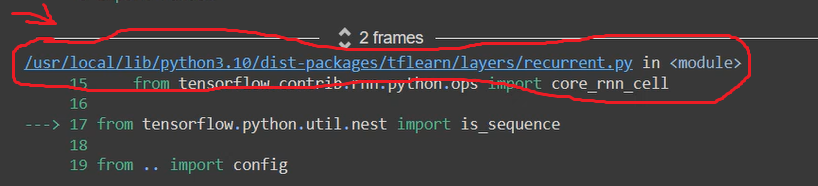

Sau khi click , nó sẽ hiện ra nội dung của file vừa mở và đưa đên vị trí đang bị lỗi.

**Sửa lỗi**

> Theo thông báo thì lỗi ở dòng: from tensorflow.python.util.nest import is_sequence , để sửa lỗi này, cần thay thế đoạn **is_sequence** thành **is_sequence_or_composite** .


In [ ]:
# Import các thư viện và module cần thiết
from pyvi import ViTokenizer, ViPosTagger
import numpy as np
import tflearn
import tensorflow as tf
import random
import json
import pickle
import datetime
import webbrowser
from Stopwords import stop_words_vi

# Đọc dữ liệu intent từ file JSON

Cần sửa đường dẫn đến file intents.json trước khi chạy, copy path file và thay thế.


In [ ]:
intents = json.loads(open('intents.json', encoding='utf-8').read())

In ra để kiểm tra dữ liệu file Json

In [ ]:
# In ra 5 dòng dữ liệu từ file JSON
for key, value in intents.items():
    print(f"Dữ liệu cho '{key}':")
    for item in value[:10]:
        print(item)
    print()

Dữ liệu cho 'intents':
{'tag': 'greeting', 'patterns': ['xin chào', 'Xinn chào', 'chào', 'hi', 'hello', 'chào bạn', 'chào nhé', 'chào cậu nhé', 'hey', 'hú', 'hí'], 'responses': ['Xin chào bạn', 'Chào bạn', 'Chào cậu', 'Chào bạn nhé', 'Chào bạn tôi là bot', 'Bạn có cần mình giúp gì không?']}
{'tag': 'farewell', 'patterns': ['tạm biệt', 'bye', 'goodbye', 'bye bye', 'tạm biệt nhé', 'Hẹn gặp lại bạn sau', 'bye nhé', 'chia tay đi'], 'responses': ['Tạm biệt bạn', 'Hẹn gặp lại bạn sau', 'Bye bye', 'Bye bye bạn', 'Bye bye tôi là bot', 'Bye bye nhé', 'rất vui được giúp đỡ bạn!']}
{'tag': 'thanks', 'patterns': ['cảm ơn', 'thanks', 'thank you', 'thank you so much', 'cảm ơn bạn', 'cảm ơn bạn nhiều', 'cảm ơn bạn nhé', 'cảm ơn bạn rất nhiều', 'cảm ơn'], 'responses': ['Không có gì', 'Không có gì bạn', 'Không có gì đâu', 'Không có gì đâu', 'Nếu bạn cần giúp đỡ hãy tìm đến mình nhé, đừng ngại!']}
{'tag': 'name_bot', 'patterns': ['Bạn là ai?', 'ban la ai?', 'bạn la ai?', 'ban ten gi?', 'bạn tên gì?'], '

# Tiền xử lý - Preprocessing data


Khởi tạo các danh sách để lưu trữ từ, lớp, và tài liệu

In [ ]:
words = []
classes = []
documents = []

Xử lý các mẫu câu và xây dựng danh sách từ và tài liệu

In [ ]:
for intent in intents['intents']:
    for pattern in intent['patterns']:
        w = ViTokenizer.tokenize(pattern)
        words.extend(w.split())
        documents.append((w.split(), intent['tag']))
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

Tiền xử lý danh sách từ: chuyển thành chữ thường và loại bỏ từ dừng

In [ ]:
words = [w.lower() for w in words if w not in stop_words_vi]
words = sorted(list(set(words)))

In ra để xem dữ liệu words


In [ ]:
words[0:20]

[',',
 '.',
 '?',
 'ai',
 'ba',
 'ban',
 'bao_lâu',
 'bao_nhiêu',
 'biết',
 'bodyweight_exercises',
 'buổi',
 'bye',
 'bài_tập',
 'bí_quyết',
 'bạn',
 'bất_kỳ',
 'bắt_đầu',
 'bắt_đầu_từ',
 'bằng',
 'bỏ_cuộc']

Kiểm tra số lượng words

In [ ]:
len(words)

228

Sắp xếp danh sách lớp và chuẩn bị các danh sách training và output

In [ ]:
classes = sorted(list(set(classes)))

In ra để xem dữ liệu classes

In [ ]:
classes[0:20]

['ask_mental_health',
 'ask_rest_days',
 'ask_supplements',
 'ask_trainer',
 'ask_training_advice',
 'ask_training_schedule',
 'ask_warm_up',
 'bat_dau_tap',
 'body_weight_training',
 'cam_on_tap_gym',
 'congtac',
 'cool_down',
 'dich_vu',
 'dinh_duong',
 'farewell',
 'gio_hoat_dong',
 'gioi_thieu_the_hinh',
 'goal_setting',
 'goicuoc',
 'greeting']

Kiểm tra số lượng classes

In [ ]:
len(classes)

51

Tạo danh sách mẫu câu và vector đầu ra tương ứng

In [ ]:
training = []
output = []
output_empty = [0] * len(classes)

Xử lý dữ liệu văn bản để chuẩn bị cho việc huấn luyện

In [ ]:
for document in documents:
    bag = []
    word_patterns = document[0]  # Lấy ra các mẫu từ trong tài liệu
    word_patterns = [w.lower() for w in word_patterns if w not in stop_words_vi]  # Chuyển đổi thành chữ thường và loại bỏ từ ngữ dừng
    for word in words:
        bag.append(1) if word in word_patterns else bag.append(0)  # Tạo bag-of-words: 1 nếu từ xuất hiện, ngược lại là 0
    output_row = list(output_empty)  # Tạo một hàng output rỗng có độ dài bằng số lớp
    output_row[classes.index(document[1])] = 1  # Gán giá trị 1 cho lớp tương ứng với tài liệu này
    training.append([bag, output_row])  # Thêm dữ liệu huấn luyện vào danh sách huấn luyện


Chuyển đổi danh sách training và output thành dạng numpy array

In [ ]:
training_x = np.array([x[0] for x in training])
training_y = np.array([x[1] for x in training])

Xem thông tin dữ liệu training_x và training_y sau khi chuyển đổi thành dạng numpy array


In [ ]:
training_x, training_y

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0]]),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]))

# Xây dựng mô hình


Đặt lại đồ thị mặc định của TensorFlow

In [ ]:
tf.compat.v1.reset_default_graph()

Xây dựng mô hình mạng nơ-ron

In [ ]:
net = tflearn.input_data(shape=[None, len(training_x[0])])
net = tflearn.fully_connected(net, 16)
net = tflearn.fully_connected(net, 16)
net = tflearn.fully_connected(net, len(training_y[0]), activation='softmax')
net = tflearn.regression(net, optimizer='adam', loss='categorical_crossentropy')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


# Khởi tạo đối tượng mô hình DNN của tflearn
Log file sẽ được lưu vào thư mục data, cần thay đổi thư mục để lưu vào vị trí mong muốn.

In [ ]:
model = tflearn.DNN(net, tensorboard_dir='tflearn_logs')

# Huấn luyện và lưu mô hình
> epoch và batch size có thể tùy chỉnh dựa vào kích thước dữ liệu.

> Nếu đã có file huấn luyện mô hình trước đó thì có thể bỏ qua phần này và các phần lưu dữ liệu.


In [ ]:
model.fit(training_x, training_y, n_epoch=200, batch_size=8, show_metric=True)
model.save('model.tflearn')

Training Step: 4799  | total loss: 0.02488 | time: 0.137s
| Adam | epoch: 200 | loss: 0.02488 - acc: 0.9898 -- iter: 184/189
Training Step: 4800  | total loss: 0.02645 | time: 0.143s
| Adam | epoch: 200 | loss: 0.02645 - acc: 0.9898 -- iter: 189/189
--


Lưu thông tin về dữ liệu training

In [ ]:
training_data = {
    "words": words,
    "classes": classes,
    "training_x": training_x,
    "training_y": training_y
}

Lưu dữ liệu training vào file pickle

In [ ]:
with open("training_data.pkl", "wb") as data_file:
    pickle.dump(training_data, data_file)

# Đánh giá mô hình

Nếu chạy phần đánh giá này thì cần phải training lại mô hình để đảm bảo tính chính xác.

Đọc dữ liệu training từ file pickle

In [ ]:
with open("training_data.pkl", "rb") as data_file:
    training_data = pickle.load(data_file)

words = training_data["words"]
classes = training_data["classes"]
training_x = training_data["training_x"]
training_y = training_data["training_y"]

Kiểm tra độ chính xác của mô hình đã huấn luyện




In [ ]:
#Dự đoán intent cho một câu
def predict_intent(sentence):
    sentence_bag = [0] * len(words)
    w = ViTokenizer.tokenize(sentence)
    w = [word.lower() for word in w.split() if word.lower() not in stop_words_vi]
    for word in w:
        for i, w in enumerate(words):
            if w == word:
                sentence_bag[i] = 1

    # Dự đoán intent cho câu với mô hình đã huấn luyện
    results = model.predict([np.array(sentence_bag)])
    # Lấy nhãn có xác suất dự đoán cao nhất
    results_index = np.argmax(results)
    predicted_intent = classes[results_index]
    return predicted_intent

Tính toán accuracy trên dữ liệu huấn luyện và in ra kết quả

In [ ]:
correct = 0
for i, sentence in enumerate(training_x):
    predicted = predict_intent(' '.join([words[j] for j in range(len(words)) if sentence[j] == 1]))
    true_label = ' '.join([classes[j] for j in range(len(classes)) if training_y[i][j] == 1])
    if predicted == true_label:
        correct += 1

In [ ]:
accuracy = correct / len(training_x)
print(f"Accuracy on training data: {accuracy * 100:.2f}%")

Accuracy on training data: 97.88%


# Phần Chatbot
Cần load lại dữ liệu và thông tin từ mô hình đã training

In [ ]:
# Load model
model.load('model.tflearn')

In [ ]:
# Đọc dữ liệu training từ file pickle
with open("training_data.pkl", "rb") as data_file:
    training_data = pickle.load(data_file)

words = training_data["words"]
classes = training_data["classes"]
training_x = training_data["training_x"]
training_y = training_data["training_y"]


Các hàm tiện ích cho việc xử lý câu hỏi và tạo vector BoW

In [ ]:
def clean_up_sentence(sentence):
     # Sử dụng ViTokenizer để tách từ trong câu và lưu vào biến sentence_words
    sentence_words = ViTokenizer.tokenize(sentence)
    # Chuyển đổi các từ thành chữ thường và loại bỏ các từ dừng
    sentence_words = [w.lower() for w in sentence_words.split() if w not in stop_words_vi]
    # Trả về danh sách các từ đã được tiền xử lý
    return sentence_words

In [ ]:
# Hàm Bow
def bow(sentence, words, show_details=False):
    sentence_words = clean_up_sentence(sentence)
    bag = [0] * len(words)
    for s in sentence_words:
        for i, w in enumerate(words):
            if w == s:
                bag[i] = 1
                if show_details:
                    print("found in bag: %s" % w)
    return np.array(bag)

Thiết lập ngưỡng lỗi cho việc phân loại

In [ ]:
ERROR_THRESHOLD = 0.25

Hàm classify đã thay đổi để sử dụng mô hình đã tải

In [ ]:
def classify(sentence):
    results = model.predict([bow(sentence, words)])[0]
    results = [[i, r] for i, r in enumerate(results) if r > ERROR_THRESHOLD]
    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in results:
        return_list.append((classes[r[0]], r[1]))
    return return_list

Hàm xử lý câu hỏi và trả về câu trả lời tương ứng

In [ ]:
def response(sentence):
    if 'time' in sentence:
        # Trả về thời gian hiện tại
        current_time = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        return f"Thời gian hiện tại là: {current_time}"
    elif any(word in sentence for word in ['google', 'youtube', 'wikipedia', 'facebook', 'twitter', 'instagram', 'github', 'stackoverflow', 'gmail']):
        # Nếu câu nhập chứa từ khóa về các trang web, mở trình duyệt và điều hướng đến trang web tương ứng
        website = {
            'google': 'https://www.google.com',
            'youtube': 'https://www.youtube.com',
            'wikipedia': 'https://www.wikipedia.org',
            'facebook': 'https://www.facebook.com',
            'twitter': 'https://www.twitter.com',
            'instagram': 'https://www.instagram.com',
            'github': 'https://www.github.com',
            'stackoverflow': 'https://www.stackoverflow.com',
            'gmail': 'https://mail.google.com'
        }
        # Mở trình duyệt và điều hướng đến trang web tương ứng với từ khóa trong câu nhập
        webbrowser.open(website[next(word for word in website if word in sentence)])
        return f"Đã mở trình duyệt và điều hướng đến {next(word for word in website if word in sentence).capitalize()}."
    else:
        # Nếu không có từ khóa nào phù hợp, sử dụng hàm classify để dự đoán intent và trả về câu trả lời
        results = classify(sentence)
        if results:
            intent, confidence = results[0]
            print(f"Predicted Intent: {intent}, Confidence: {confidence}")
            # Lấy câu trả lời từ danh sách câu trả lời của intent có độ tin cậy cao nhất
            for i in intents['intents']:
                if i['tag'] == intent:
                    responses = i['responses']
                    return random.choice(responses)
        else:
            # Nếu không dự đoán được intent, trả về thông báo không hiểu
            return "Xin lỗi, tôi không hiểu câu hỏi của bạn."

In [ ]:
# Tên của chatbot
bot_name = "Sam"

Bắt đầu vòng lặp để chạy chatbot

In [ ]:
if __name__ == "__main__":
    print("Let's chat! (type 'quit' to exit)")
    while True:
        sentence = input("You: ")
        if sentence == "quit":
            break

        # Gọi hàm response để nhận câu trả lời và in ra màn hình
        resp = response(sentence)
        print(resp)

Let's chat! (type 'quit' to exit)
You: xin chào
Predicted Intent: greeting, Confidence: 0.9988973140716553
Chào bạn
You: bạn là ai?
Predicted Intent: name_bot, Confidence: 0.9811046719551086
Tôi chỉ là chatbot thôi, tôi không cần tên
You: Mình cần bạn tư vấn tập gym giúp mình
Predicted Intent: tu_van_ho_tro, Confidence: 0.8721693754196167
Nếu bạn cần thêm sự hỗ trợ hoặc tư vấn cụ thể, hãy liên hệ với chuyên gia tập luyện hoặc bác sĩ. Chúng tôi sẽ hỗ trợ bạn!
You: tôi muốn hỏi thông tin về cardio
Predicted Intent: training_goal, Confidence: 0.7941620945930481
Rất tốt! Mình sẽ giúp bạn thiết kế một lịch tập phù hợp với mục tiêu của bạn.
You: cảm ơn bạn
Predicted Intent: thanks, Confidence: 0.9974148273468018
Không có gì bạn
You: tạm biệt nhé
Predicted Intent: farewell, Confidence: 0.9992534518241882
Bye bye bạn
You: quit
